 # Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading the Datasets

In [2]:
df =pd.read_csv("/content/Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.shape

(148, 7)

# DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df1 = df.copy()

In [10]:
# Convert the dtype of rate column[I wanna remove denominator from rate column]

df['rate'] = df['rate'].str[:3]
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


 # Data Visualisation & Analysis  the Datasets by solving following queries

1. What type of restaurant do most customers order from?

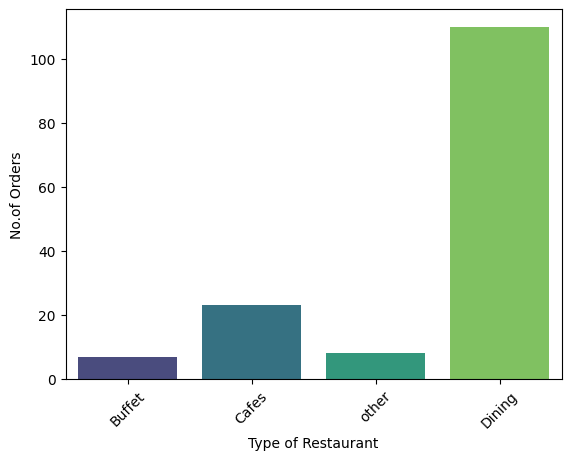

In [23]:
# To solve above query we need to understand how many types of restaurant are available in this dataset
# By using countplot

sns.countplot(x='listed_in(type)', data=df, palette='viridis')
plt.xlabel('Type of Restaurant')
plt.ylabel('No.of Orders')
plt.xticks(rotation=45)
plt.show()

**Conclusion :- Most of Customer order food from Dining Restaurant **


2. How many votes has each type of restaurant received from customers?

In [26]:
df['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

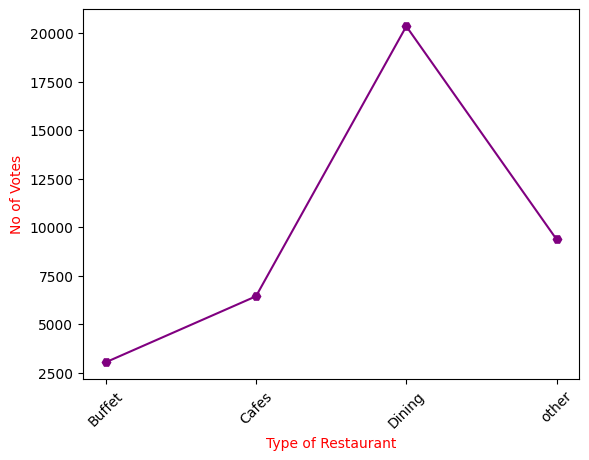

In [37]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,color = 'purple',marker= 'H')
plt.xlabel('Type of Restaurant', c='red',size = 10)
plt.ylabel('No of Votes', c='red',size = 10)
plt.xticks(rotation=45)
plt.show()

**Conclusion:- Most of Votes occured from Dining Restaurant **

3. What are the ratings that the majority of restaurants have received?

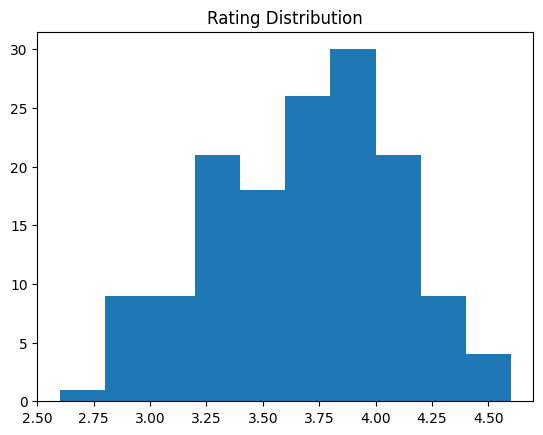

In [41]:
plt.hist(df['rate'],bins = 10)
plt.title('Rating Distribution')
plt.show()

**Conclusion:- We can observe that the highest rating is 4 and average rating are from 3.25 to 4.**

4. Zomato has noticed that most couples place their food orders online. What is the average amount spent per order?

In [42]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

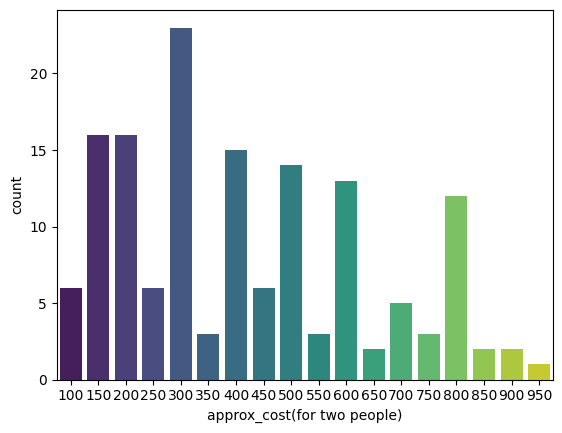

In [45]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data, palette = 'viridis')

**Conclusion:- Average amount couples can spent on order is 300 Rupees**

5. Which mode has received the maximum ratings?

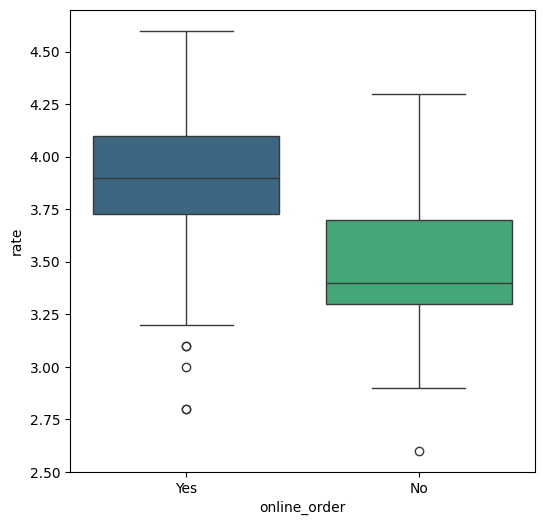

In [49]:
plt.figure(figsize= (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df, palette = 'viridis')
plt.show()

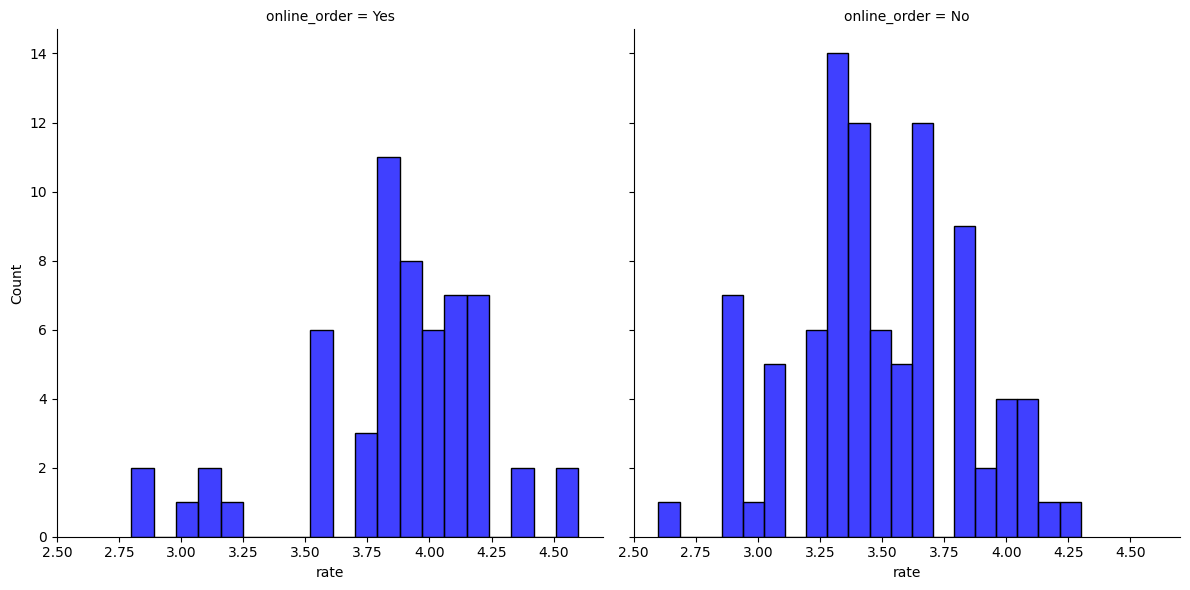

In [51]:
g = sns.FacetGrid(df, col='online_order', height=6, aspect=1)
g.map(sns.histplot, 'rate', bins=20, color='blue')
plt.show()

**Conclusion:- Online order receive maximum ratings**

6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with good offers?

In [54]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


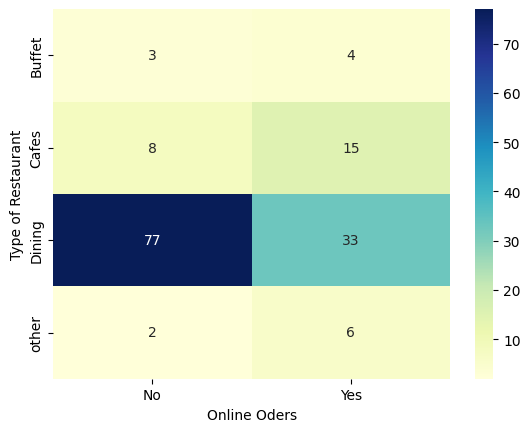

In [58]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='name', aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Online Oders')
plt.ylabel('Type of Restaurant')
plt.show()

**Conclusion:- More offline orders are received from Dining & least offline orders are received from others**